In [1]:
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, sent_tokenize
lemm = WordNetLemmatizer()
import scipy
from scipy import spatial
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
stopwords = stopwords.words('english')

In [3]:
def load_data(FileName = './EN-wform.w.5.cbow.neg10.400.subsmpl.txt'):
    
    embeddings = {}
    file = open(FileName,'r')
    i = 0
    print "Loading word embeddings first time"
    for line in file:
        # print line

        tokens = line.split('\t')

        #since each line's last token content '\n'
        # we need to remove that
        tokens[-1] = tokens[-1].strip()

        #each line has 400 tokens
        for i in xrange(1, len(tokens)):
            tokens[i] = float(tokens[i])
            
        embeddings[tokens[0]] = tokens[1:-1]
    print "finished"
    return embeddings
e = load_data()

Loading word embeddings first time
finished


In [4]:
print "size of embedding corpus ", len(e)

size of embedding corpus  300000


In [7]:
sentence= "Four people are dead in an accident"
# sentence = "Facebook is very popular social media"
# a = [lemm.lemmatize(sentence)]
l = [lemm.lemmatize(s) for s in word_tokenize(sentence)]
sen = []
for s in l:
    if s not in stopwords:
        sen.append(s)
print sen

['Four', 'people', 'dead', 'accident']


In [112]:
sentence1 = "Facebook is most famous social media"
l = [lemm.lemmatize(s) for s in word_tokenize(sentence1)]
sen1 = []
for s in l:
    if s not in stopwords:
        sen1.append(s)
print sen1

['Facebook', 'famous', 'social', u'medium']


In [113]:
labels1 = []
tokens1 = []
for i in sen1:
    if i in e:
        labels1.append(i)
        tokens1.append(e[i])
    else:
        print i

Facebook


In [114]:
labels = []
tokens = []
for i in sen:
    if i in e:
        labels.append(i)
        tokens.append(e[i])
    else:
        print i

Facebook


In [123]:
print type(tokens)

<type 'list'>


In [133]:
vec = computeVecSum(tokens)
vec = vec.reshape(399,1)
# vec = vec.tolist()

n  3
d  399
len s 399


In [134]:
vec1 = computeVecSum(tokens1)
vec1 = vec1.reshape(399,1)
# vec1 = vec1.tolist()

n  3
d  399
len s 399


In [79]:
1 - spatial.distance.cosine(vec, vec1)


0.86389789597274069

In [80]:
# for i in e.keys():
#     labels.append(i)
#     tokens.append(e[i])

In [139]:
tsne_model = TSNE(perplexity=40, n_components=2, init='random', n_iter=20000, random_state=23)


In [140]:
new_values = tsne_model.fit_transform(vec)

In [141]:
new_values1 = tsne_model.fit_transform(vec1)

In [142]:
print new_values
print 
print new_values1

[[-13.1114378  -15.11901569]
 [ 12.39655209  -3.69438124]
 [ 22.00714684   1.90144265]
 [-18.12506485 -16.81267166]
 [ 20.15873718   0.87211466]
 [-13.8225565  -15.19764328]
 [ 11.35818863  -4.18346643]
 [-27.93818474 -19.36526108]
 [ 16.01999092  -1.2760191 ]
 [-10.08121681 -14.28280067]
 [ 20.43143654   1.00770688]
 [ 23.23576355   2.55947709]
 [-22.50991631 -17.87602997]
 [-27.8555603  -19.35565758]
 [  5.66002846  -6.83867931]
 [-24.45194054 -18.59047318]
 [  7.62125921  -5.86474085]
 [ -2.29524946 -10.76020908]
 [-14.9105835  -15.5787735 ]
 [ 17.08601761  -0.96595609]
 [  6.13995743  -6.52419233]
 [  3.17090893  -8.04630852]
 [ 23.51385498   2.77896452]
 [-26.43689537 -19.19979095]
 [ 20.06162071   1.16832364]
 [  7.48913574  -6.24993944]
 [-27.20654488 -19.37293053]
 [ -2.33277678 -10.78380203]
 [ 18.64834785   0.19104388]
 [ 26.31420708   4.57241106]
 [ 10.42494774  -4.52860546]
 [-22.97702026 -17.8125267 ]
 [-17.85540581 -16.20659828]
 [  5.3152647   -7.07854891]
 [ 22.76507759

In [143]:
x = []
y = []
x1 = []
y1 = []

for value in new_values:
    x.append(value[0])
    y.append(value[1])

# for value in new_values1:
#     x1.append(value[0])
#     y1.append(value[1])

    
plt.figure(figsize=(10, 10)) 

for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    
# for i in range(len(x1)):
#     plt.scatter(x1[i],y1[i])
#     plt.annotate(labels[i],
#                  xy=(x1[i], y1[i]),
#                  xytext=(5, 2),
#                  textcoords='offset points',
#                  ha='right',
#                  va='bottom')
    
plt.show()

IndexError: list index out of range

In [103]:
def computeVecSum(vectors):
    
#     print "vec ", vectors
    n = len(vectors)  # vectors contains embedding score for each lemma word in sent
    d = len(vectors[0]) #length of embeddings of first lemma word
    print "n ", n
    print "d ", d
    s = []
    for i in xrange(d):
        s.append(0)
   
    print "len s", len(s)
    s = np.array(s)
    
    for vec in vectors:
#         print "vec ", vec
#         print ""
#         print "np.array vec ", np.array(vec)
        s = s + np.array(vec)
#         print "s ", s

    return (s)

TypeError: argument of type 'WordListCorpusReader' is not iterable

In [38]:

print s1_embeddings[0]

[-0.065068, 0.102869, 0.012084, -0.039473, 0.053099, 0.030533, -0.221273, -0.274629, 0.069039, 0.048271, -0.127845, 0.058551, 0.10892, 0.002561, -0.07875, 0.095428, -0.102545, 0.419506, -0.093945, -0.151256, -0.263729, 0.293964, 0.04953, 0.020583, -0.031967, -0.054301, -0.220696, -0.483235, 0.201868, 0.17845, 0.376904, -0.032984, -0.182479, -0.108932, 0.044532, -0.441946, -0.085237, 0.20797, -0.238585, -0.17859, 0.254468, -0.209217, -0.056778, 0.178384, -0.127397, -0.223559, -0.009941, 0.119997, -0.02215, 0.097055, 0.027439, -0.036522, 0.295214, -0.197752, -0.138925, 0.104741, 0.170016, 0.05149, 0.072143, -0.130693, 0.009167, -0.234335, 0.161969, 0.030198, 0.271232, -0.154253, -0.071894, -0.010379, -0.054703, -0.110899, -0.46062, 0.130834, 0.56501, 0.131039, -0.090539, -0.416162, -0.035844, -0.097906, 0.13058, 0.165938, -0.193905, 0.179959, 0.188628, -0.206238, 0.251281, 0.168307, 0.455665, -0.090135, -0.166363, -0.024158, 0.417284, 0.061599, 0.063469, -0.033853, -0.187466, 0.077993, 0

In [39]:
print s1_embeddings[1]

[0.072583, 0.078089, -0.016204, -0.023273, 0.15391, 0.054805, 0.154717, 0.039942, 0.079678, 0.179565, 0.192243, 0.097473, -0.088845, -0.115987, 0.175042, 0.174271, 0.176486, -0.25281, -0.032729, -0.164844, -0.111476, -0.243505, 0.053789, 0.029361, -0.02391, 0.198328, -0.434347, -0.110828, 0.291004, -0.122566, -0.104732, -0.023794, 0.200701, 0.325644, 0.004822, 0.076894, -0.132892, 0.130618, -0.064529, 0.062003, 0.111703, -0.156175, -0.22232, 0.142705, 0.044968, -0.302722, -0.07348, -0.023132, -0.190527, 0.063205, -0.109001, 0.049125, 0.103141, 0.052995, 0.324906, -0.173599, 0.33227, 0.158926, 0.040479, -0.201127, -0.007332, -0.262135, 0.334075, -0.117615, -0.134641, -0.044902, -0.036581, -0.102586, 0.053575, 0.085227, -0.044011, 0.270034, 0.130741, -0.031242, 0.130104, 0.207324, -0.071529, 0.092676, 0.014283, 0.23303, -0.068268, -0.023114, -0.462545, -0.228085, 0.233879, -0.163554, -0.115362, 0.20525, -0.296066, -0.015879, 0.108535, 0.150944, -0.04844, -0.175048, -0.047505, -0.165742, 

In [41]:
vec = computeVecSum(s1_embeddings)
vec = np.asarray(vec)

n  4
d  399
len s 399
vec  [-0.065068, 0.102869, 0.012084, -0.039473, 0.053099, 0.030533, -0.221273, -0.274629, 0.069039, 0.048271, -0.127845, 0.058551, 0.10892, 0.002561, -0.07875, 0.095428, -0.102545, 0.419506, -0.093945, -0.151256, -0.263729, 0.293964, 0.04953, 0.020583, -0.031967, -0.054301, -0.220696, -0.483235, 0.201868, 0.17845, 0.376904, -0.032984, -0.182479, -0.108932, 0.044532, -0.441946, -0.085237, 0.20797, -0.238585, -0.17859, 0.254468, -0.209217, -0.056778, 0.178384, -0.127397, -0.223559, -0.009941, 0.119997, -0.02215, 0.097055, 0.027439, -0.036522, 0.295214, -0.197752, -0.138925, 0.104741, 0.170016, 0.05149, 0.072143, -0.130693, 0.009167, -0.234335, 0.161969, 0.030198, 0.271232, -0.154253, -0.071894, -0.010379, -0.054703, -0.110899, -0.46062, 0.130834, 0.56501, 0.131039, -0.090539, -0.416162, -0.035844, -0.097906, 0.13058, 0.165938, -0.193905, 0.179959, 0.188628, -0.206238, 0.251281, 0.168307, 0.455665, -0.090135, -0.166363, -0.024158, 0.417284, 0.061599, 0.063469, -0.033

In [31]:
tsne = TSNE(n_components=2, random_state=0)

In [32]:
x_2d = tsne.fit_transform(vec)

ValueError: Expected 2D array, got 1D array instead:
array=[ -5.06995976e-01  -1.00890003e-01   4.66253012e-01  -3.20971996e-01
   7.78469965e-02   1.32551998e-01  -5.13881028e-01  -3.08555990e-01
   3.25076997e-01   2.47961000e-01   9.52510014e-02   8.36371005e-01
   3.23680006e-02  -4.11038011e-01   2.53428996e-01  -2.40199994e-02
   1.64309993e-01   7.08458006e-01  -4.16299999e-02  -3.70164990e-01
  -5.49434006e-01  -6.99170008e-02   2.07579002e-01  -9.03000012e-02
  -2.99266994e-01  -1.19506001e-01  -1.11486304e+00  -1.00718498e+00
   3.10698003e-01   2.56570011e-01   2.96036005e-01  -2.25134000e-01
  -1.51751995e-01  -2.08905995e-01   9.46250036e-02  -7.33370006e-01
  -2.27896005e-01   9.38764989e-01  -9.25253987e-01  -2.42096007e-01
   8.44981015e-01  -5.19558012e-01  -1.20998003e-01   4.76907998e-01
   3.82014006e-01  -2.51527011e-01  -3.75367999e-01   1.20086998e-01
  -5.53708971e-01   2.26191998e-01  -1.76589992e-02  -1.78351998e-01
   6.36353016e-01  -2.80645996e-01   3.14529985e-02   1.07035004e-01
   6.02931976e-01  -2.07268998e-01   5.07735014e-01  -1.75088003e-01
  -2.36064002e-01  -7.29963005e-01   7.30892003e-01   2.84114003e-01
   1.76391006e-01  -4.60000010e-04  -4.03995991e-01  -1.08906001e-01
   5.31050004e-02  -3.24972987e-01  -3.29562008e-01   5.01452982e-01
   1.01994705e+00   1.97111994e-01  -2.48775005e-01  -2.17280000e-01
  -3.35370988e-01  -5.68300001e-02   3.18262994e-01   1.00306594e+00
  -5.13875008e-01  -1.54889002e-01   7.49399979e-03  -5.26506007e-01
   6.19095027e-01  -3.83509994e-02   2.59528995e-01   3.08043003e-01
  -4.51122999e-01  -4.92976010e-01   9.89722013e-01   2.74291009e-01
  -3.74228001e-01  -5.12751997e-01  -3.73598009e-01  -2.32965007e-01
   3.71737987e-01   6.44012988e-01  -6.88292980e-01  -2.76434988e-01
   2.97596991e-01  -5.28266013e-01  -1.28739998e-01   1.13415897e+00
   1.05430000e-02   6.23651981e-01   1.84194997e-01  -4.03328001e-01
   4.62888002e-01  -5.99433005e-01  -4.25996989e-01  -7.35339969e-02
  -6.05476975e-01  -6.55981004e-01  -8.09459984e-02  -6.82779998e-02
  -2.07876995e-01   3.90915990e-01  -4.18725014e-01  -4.81679998e-02
  -4.89486009e-01  -5.62300026e-01  -3.57742012e-01  -4.75172013e-01
   9.73824024e-01   2.45930001e-01   3.81379008e-01  -7.18437016e-01
  -2.17888996e-01   3.93124998e-01  -3.48270014e-02   4.81219999e-02
  -3.31600994e-01   5.28365016e-01   4.26586986e-01  -4.11980003e-01
   3.88469994e-02  -3.81282002e-01   3.49199995e-02   2.29053006e-01
   1.51438996e-01   1.00547001e-01  -1.46575004e-01   3.60965997e-01
  -2.73312986e-01   3.42911988e-01   4.74040985e-01   2.32418001e-01
   1.08205996e-01  -1.23668998e-01   6.23143971e-01   3.12047005e-01
  -3.33880007e-01  -5.57404995e-01   1.56642604e+00  -3.27463001e-01
   2.20039994e-01  -5.30259982e-02   2.40410998e-01   3.42689991e-01
  -1.14915997e-01  -1.63510993e-01   9.92529988e-02  -3.30610014e-02
   4.62027013e-01   1.06189996e-02   2.48839006e-01   3.44458014e-01
  -6.17453992e-01   3.62369001e-01   6.45314991e-01  -2.16011003e-01
   2.62190014e-01  -2.94109993e-02  -2.52588004e-01   1.51324004e-01
   3.54075998e-01   4.81830001e-01  -3.94192994e-01   2.24908993e-01
   4.17030990e-01  -1.30383000e-01  -1.10339001e-01  -1.30472004e-01
   1.56071007e-01   1.21191002e-01  -1.65427998e-01  -5.53292990e-01
  -2.31457993e-01  -4.50737000e-01  -1.60036996e-01   6.04230016e-02
   2.49463007e-01   4.35427994e-01  -2.27537006e-01  -3.38159986e-02
   3.73196006e-01  -6.53373003e-01  -3.57443005e-01  -1.38203993e-01
   4.61474001e-01  -6.49815977e-01   2.02754006e-01   4.70788985e-01
   2.47648999e-01   1.37385994e-01  -9.30539966e-02   1.05789997e-01
  -1.42957002e-01  -9.45891976e-01   6.46310002e-02   4.58864987e-01
   1.00943995e+00  -8.52029979e-01  -5.05477011e-01   6.85234010e-01
   2.39635006e-01   6.03938997e-01   2.88852990e-01   1.62350997e-01
   2.69533008e-01  -6.81019008e-01   3.20248991e-01   5.31437993e-01
  -3.40521008e-01   3.58467996e-01  -3.21283996e-01  -1.07985699e+00
  -2.31987000e-01   3.47279996e-01  -3.43865991e-01   2.01673999e-01
   3.35575014e-01   1.11919995e-02  -5.56783974e-01  -2.06751004e-01
  -1.67861998e-01  -2.88013011e-01   6.56740010e-01   2.34171003e-01
  -6.04072988e-01  -1.74989000e-01  -2.95446992e-01   9.97795999e-01
  -2.94393003e-01  -8.87729973e-02  -1.90961003e-01  -2.39184007e-01
   6.90531015e-01  -2.83813000e-01  -2.05460005e-02   6.51189983e-02
   3.16332012e-01  -6.10340014e-02   5.09814024e-01  -4.34011996e-01
  -9.83223975e-01  -1.54805005e-01   2.62356997e-01   2.37708002e-01
   3.16834003e-01  -5.00184000e-01  -4.54210013e-01  -7.99059987e-01
   9.00044978e-01  -3.11623991e-01   1.97070003e-01  -8.63788009e-01
  -3.50796998e-01   1.01538002e-01   2.99629986e-01   2.89983988e-01
  -5.20600006e-03   1.75133005e-01   1.27204999e-01   3.89261991e-01
   6.25909984e-01  -1.11050002e-01   6.56705022e-01   9.93434012e-01
  -4.19979990e-02  -4.80070002e-02  -1.28556997e-01   7.10464001e-01
  -5.53153992e-01  -3.50809991e-02  -6.20777011e-01  -1.22926104e+00
   5.46164989e-01  -4.31466013e-01   2.19238997e-01   3.32800001e-02
   2.98676997e-01  -4.89073992e-01   1.68953001e-01   1.83272004e-01
  -1.71289995e-01   2.71160990e-01   1.11221001e-01  -1.71293005e-01
   3.93258989e-01   9.19499993e-01  -9.32249010e-01   2.04056993e-01
  -4.52069014e-01   3.04960996e-01  -7.16058016e-01   4.80695009e-01
   1.83569998e-01  -5.70737004e-01  -1.60537004e-01   7.88093984e-01
  -6.21122003e-01   1.74314007e-01   7.17523992e-01   6.36141002e-01
  -4.89579998e-02   3.32488000e-01  -7.01190010e-02   8.06228995e-01
  -2.17984006e-01  -6.08636975e-01  -1.70497999e-01   8.09615016e-01
   4.62381989e-01  -6.36192977e-01  -6.51829988e-02  -4.69471991e-01
   5.16698003e-01   2.08903000e-01  -4.80181009e-01   4.76009995e-01
   1.79279000e-01   5.06058991e-01  -6.61248982e-01  -2.39739995e-02
  -5.20262003e-01  -4.22628999e-01   3.49679999e-02   9.60090011e-02
   2.15209007e-01  -4.68751997e-01   8.49609971e-02  -5.75155020e-01
  -1.82785004e-01  -1.28849996e-02   3.70371014e-01   3.61853987e-01
   4.63578999e-01   5.74181020e-01   8.45654011e-01   3.22526008e-01
  -1.72739998e-02  -7.80012012e-01  -7.77897000e-01  -4.67539996e-01
  -3.77687007e-01   7.28703976e-01   9.67570022e-02   4.29378003e-01
  -1.31587997e-01   5.77068985e-01   5.70883989e-01  -1.97959006e-01
  -4.56169009e-01  -1.88510008e-02  -4.50641990e-01  -4.83018011e-01
  -1.63130000e-01  -7.94744015e-01  -2.06908002e-01   3.31109986e-02
   1.59676000e-01  -9.27499980e-02   5.70221007e-01  -4.00925010e-01
  -3.56231004e-01  -1.20791003e-01  -3.96313995e-01  -1.40083000e-01
   5.06799994e-03   1.63904995e-01  -3.99518996e-01  -2.60178000e-01
   1.72259994e-02  -7.38973975e-01   2.48170003e-01   1.57100007e-01
   4.31436986e-01  -2.96122998e-01   1.82824001e-01   1.37750000e-01
   4.22779992e-02   4.25060987e-01  -3.56106013e-01  -5.85801005e-01
  -3.33739012e-01   1.70347005e-01  -6.30236983e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [16]:
Plot.figure(figsize=(200, 200), dpi=100)
max_x = np.amax(reduced_matrix, axis=0)[0]
max_y = np.amax(reduced_matrix, axis=0)[1]
Plot.xlim((-max_x,max_x))
Plot.ylim((-max_y,max_y))

Plot.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], 20);

# for row_id in range(0, len(rows)):
#     target_word = glove_words[rows[row_id]]
#     x = reduced_matrix[row_id, 0]
#     y = reduced_matrix[row_id, 1]
#     Plot.annotate(target_word, (x,y))

# Plot.savefig("glove_2000.png");

TypeError: 'TSNE' object does not support indexing

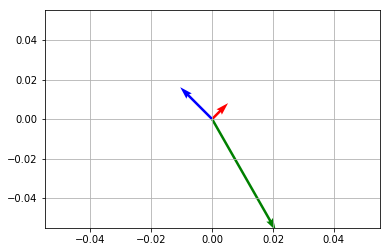

In [6]:


V = np.array([[1,1],[-2,2],[4,-7]])
origin = [0], [0] # origin point

plt.quiver(origin[0], origin[1], V[:,0], V[:,1], color=['r','b','g'], scale=21)
plt.grid(True)
plt.show()

In [20]:

sentence2 = ["organism", "and", "cell", "are", "related", "concepts"]

In [6]:
e_ = [e[sent] for sent in sentence]

In [15]:

if sentence[0] in e:
    sim = e[sentence[0]]
    
if sentence[2] in e:
    sim2 = e[sentence[2]]
    


399

In [16]:
1 - spatial.distance.cosine(sim, sim2)

0.10374947900420839

In [7]:
e_1 = [e[sent] for sent in sentence2]

In [8]:
ls = computeVecSum(e_)

n  6
d  399
len s 399


In [9]:
ls1 = computeVecSum(e_1)

n  6
d  399
len s 399


In [18]:
1 - spatial.distance.cosine(ls, ls1)

0.54543906083342486